In [2]:
import pandas as pd

In [3]:
fang_df = pd.read_csv("inputData/58fang.txt",sep=",")

In [4]:
fang_df.head()

,rooms,area,floors,location,nearbySubway,price
0,9,152.0,28,雨花,0,13684
1,8,157.0,11,雨花,0,11210
2,9,91.0,7,雨花,0,8571
3,5,90.0,30,雨花,0,10200
4,7,108.0,32,星沙,0,9074


In [5]:
fang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 6 columns):
rooms           1946 non-null int64
area            1946 non-null float64
floors          1946 non-null int64
location        1946 non-null object
nearbySubway    1946 non-null int64
price           1946 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 91.3+ KB


In [6]:
fang_df["totalprice"] = fang_df["area"]*fang_df["price"]

In [7]:
fang_df.head()

,rooms,area,floors,location,nearbySubway,price,totalprice
0,9,152.0,28,雨花,0,13684,2079968.0
1,8,157.0,11,雨花,0,11210,1759970.0
2,9,91.0,7,雨花,0,8571,779961.0
3,5,90.0,30,雨花,0,10200,918000.0
4,7,108.0,32,星沙,0,9074,979992.0


In [8]:
fang_df = fang_df.groupby("location").agg({"rooms":"sum","area":"sum","totalprice":"sum"})

In [9]:
fang_df["avgprice"] = fang_df["totalprice"] / fang_df["area"]

In [10]:
rst_df = fang_df[["rooms","avgprice"]]

In [11]:
rst_df

,rooms,avgprice
location,,
天心,1442,10643.082568
岳麓,2511,11365.023660
开福,1726,11812.805714
星沙,1455,8857.437945
望城,297,9694.842221
芙蓉,1160,10166.583273
长沙,5,9662.000000
长沙周边,556,6605.697480
雨花,3554,10717.873838


In [12]:
import matplotlib.pyplot as plt
import numpy as np

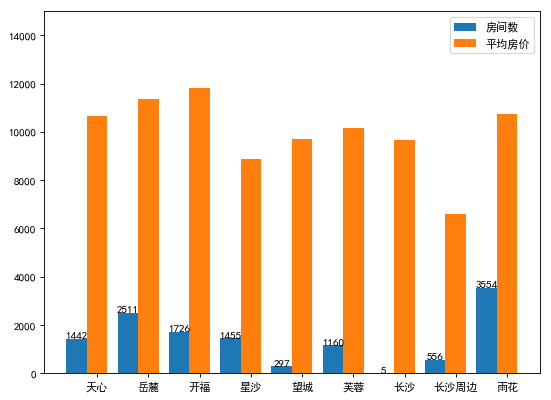

In [16]:
plt.rcParams['font.sans-serif']=['SimHei']
fig,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.bar(np.arange(len(fang_df.index)),fang_df["rooms"],width=0.4,tick_label=fang_df.index,label="房间数")
for a,b in zip(np.arange(len(fang_df.index)),fang_df["rooms"]):
    ax.text(a,b+3,b,ha="center")
ax.bar(np.arange(len(fang_df.index))+0.4,fang_df["avgprice"],width=0.4,tick_label=fang_df.index,label="平均房价")
ax.legend()

In [ ]:
ax.